In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import seaborn as sns

In [91]:
data = pd.read_csv("./Hotel-Property-Value-Dataset/train.csv")

In [92]:
data.head()

,Id,PropertyClass,ZoningCategory,RoadAccessLength,LandArea,RoadType,ServiceLaneType,PlotShape,LandElevation,UtilityAccess,...,SwimmingPoolArea,PoolQuality,BoundaryFence,ExtraFacility,ExtraFacilityValue,MonthSold,YearSold,DealType,DealCondition,HotelValue
0,775,20,RL,110.0,14226,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,395000.0
1,673,20,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,165000.0
2,234,20,RL,75.0,10650,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,128200.0
3,427,80,RL,NaN,12800,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,275000.0
4,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,311872.0


In [93]:
data.columns

Index(['Id', 'PropertyClass', 'ZoningCategory', 'RoadAccessLength', 'LandArea',
       'RoadType', 'ServiceLaneType', 'PlotShape', 'LandElevation',
       'UtilityAccess', 'PlotConfiguration', 'LandSlope', 'District',
       'NearbyTransport1', 'NearbyTransport2', 'PropertyType', 'HotelStyle',
       'OverallQuality', 'OverallCondition', 'ConstructionYear',
       'RenovationYear', 'RoofDesign', 'RoofMaterial', 'ExteriorPrimary',
       'ExteriorSecondary', 'FacadeType', 'FacadeArea', 'ExteriorQuality',
       'ExteriorCondition', 'FoundationType', 'BasementHeight',
       'BasementCondition', 'BasementExposure', 'BasementFacilityType1',
       'BasementFacilitySF1', 'BasementFacilityType2', 'BasementFacilitySF2',
       'BasementUnfinishedSF', 'BasementTotalSF', 'HeatingType',
       'HeatingQuality', 'CentralAC', 'ElectricalSystem', 'GroundFloorArea',
       'UpperFloorArea', 'LowQualityArea', 'UsableArea', 'BasementFullBaths',
       'BasementHalfBaths', 'FullBaths', 'HalfBaths', 'G

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1200 non-null   int64  
 1   PropertyClass            1200 non-null   int64  
 2   ZoningCategory           1200 non-null   object 
 3   RoadAccessLength         977 non-null    float64
 4   LandArea                 1200 non-null   int64  
 5   RoadType                 1200 non-null   object 
 6   ServiceLaneType          75 non-null     object 
 7   PlotShape                1200 non-null   object 
 8   LandElevation            1200 non-null   object 
 9   UtilityAccess            1200 non-null   object 
 10  PlotConfiguration        1200 non-null   object 
 11  LandSlope                1200 non-null   object 
 12  District                 1200 non-null   object 
 13  NearbyTransport1         1200 non-null   object 
 14  NearbyTransport2        

In [95]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(f"{i}: {data[i].isnull().sum()} missing values. Data type: {data[i].dtype}")

RoadAccessLength: 223 missing values. Data type: float64
ServiceLaneType: 1125 missing values. Data type: object
FacadeType: 702 missing values. Data type: object
FacadeArea: 7 missing values. Data type: float64
BasementHeight: 29 missing values. Data type: object
BasementCondition: 29 missing values. Data type: object
BasementExposure: 30 missing values. Data type: object
BasementFacilityType1: 29 missing values. Data type: object
BasementFacilityType2: 29 missing values. Data type: object
ElectricalSystem: 1 missing values. Data type: object
LoungeQuality: 560 missing values. Data type: object
ParkingType: 65 missing values. Data type: object
ParkingConstructionYear: 65 missing values. Data type: float64
ParkingFinish: 65 missing values. Data type: object
ParkingQuality: 65 missing values. Data type: object
ParkingCondition: 65 missing values. Data type: object
PoolQuality: 1194 missing values. Data type: object
BoundaryFence: 963 missing values. Data type: object
ExtraFacility: 1154

I think I will discard the ServiceLaneType, PoolQuality and ExtraFacility columns completely

In [96]:
data.drop(columns=["ServiceLaneType", "PoolQuality", "ExtraFacility"], inplace=True)

In [97]:
cols = [
    "BasementHeight",
    "BasementCondition",
    "BasementExposure",
    "BasementFacilityType1",
    "BasementFacilityType2",
    "ParkingType",
    "ParkingConstructionYear",
    "ParkingFinish",
    "ParkingQuality",
    "ParkingCondition"
]

null_id_map = {c: data.loc[data[c].isnull(), "Id"].tolist() for c in cols}

list_BasementHeight = null_id_map["BasementHeight"]
list_BasementCondition = null_id_map["BasementCondition"]
list_BasementExposure = null_id_map["BasementExposure"]
list_BasementFacilityType1 = null_id_map["BasementFacilityType1"]
list_BasementFacilityType2 = null_id_map["BasementFacilityType2"]

list_ParkingType = null_id_map["ParkingType"]
list_ParkingConstructionYear = null_id_map["ParkingConstructionYear"]
list_ParkingFinish = null_id_map["ParkingFinish"]
list_ParkingQuality = null_id_map["ParkingQuality"]
list_ParkingCondition = null_id_map["ParkingCondition"]



In [98]:
common_ids = set(list_BasementHeight) & set(list_BasementCondition) & set(list_BasementExposure) & set(list_BasementFacilityType1) & set(list_BasementFacilityType2)
print(len(common_ids))

29


So all are from the same row, so we can get rid of 29 data points

In [99]:
common_ids = set(list_ParkingType) & set(list_ParkingConstructionYear) & set(list_ParkingFinish) & set(list_ParkingQuality) & set(list_ParkingCondition)
print(len(common_ids))

65


again, the same rows, so 65 datapoints

Now time to do a cross check

In [100]:
cross_ids = set(list_BasementHeight) & set(list_ParkingType)
print(len(cross_ids))

7


So if we remove null values of both parking data and basement data we will loss a total of 65 + 29 - 7 = 87 rows out of 1200... I guess we can work with it

In [101]:
ids_to_drop = set(list_BasementHeight) | set(list_ParkingType)
print(f"Dropping {len(ids_to_drop)} unique Ids")

# Option A: create a new filtered DataFrame
# data = data[~data["Id"].isin(ids_to_drop)].copy()

# Option B (in-place):
data.drop(index=data[data["Id"].isin(ids_to_drop)].index, inplace=True)

print("New shape:", data.shape)

Dropping 87 unique Ids
New shape: (1113, 78)


In [102]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(f"{i}: {data[i].isnull().sum()} missing values. Data type: {data[i].dtype}")

RoadAccessLength: 210 missing values. Data type: float64
FacadeType: 625 missing values. Data type: object
FacadeArea: 7 missing values. Data type: float64
BasementExposure: 1 missing values. Data type: object
ElectricalSystem: 1 missing values. Data type: object
LoungeQuality: 486 missing values. Data type: object
BoundaryFence: 891 missing values. Data type: object


Can't afford to loose any more data. Need to fill the missing values somehow I guess

In [111]:
from sklearn.impute import KNNImputer

In [112]:
numerical_cols = data.select_dtypes(include=['float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [113]:
imputer = KNNImputer(n_neighbors=5)
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

In [114]:
data[categorical_cols] = data[categorical_cols].fillna("Unknown")

c:\Users\saanb\OneDrive\Desktop\ml_assignment_1\ML_ass\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\saanb\OneDrive\Desktop\ml_assignment_1\ML_ass\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


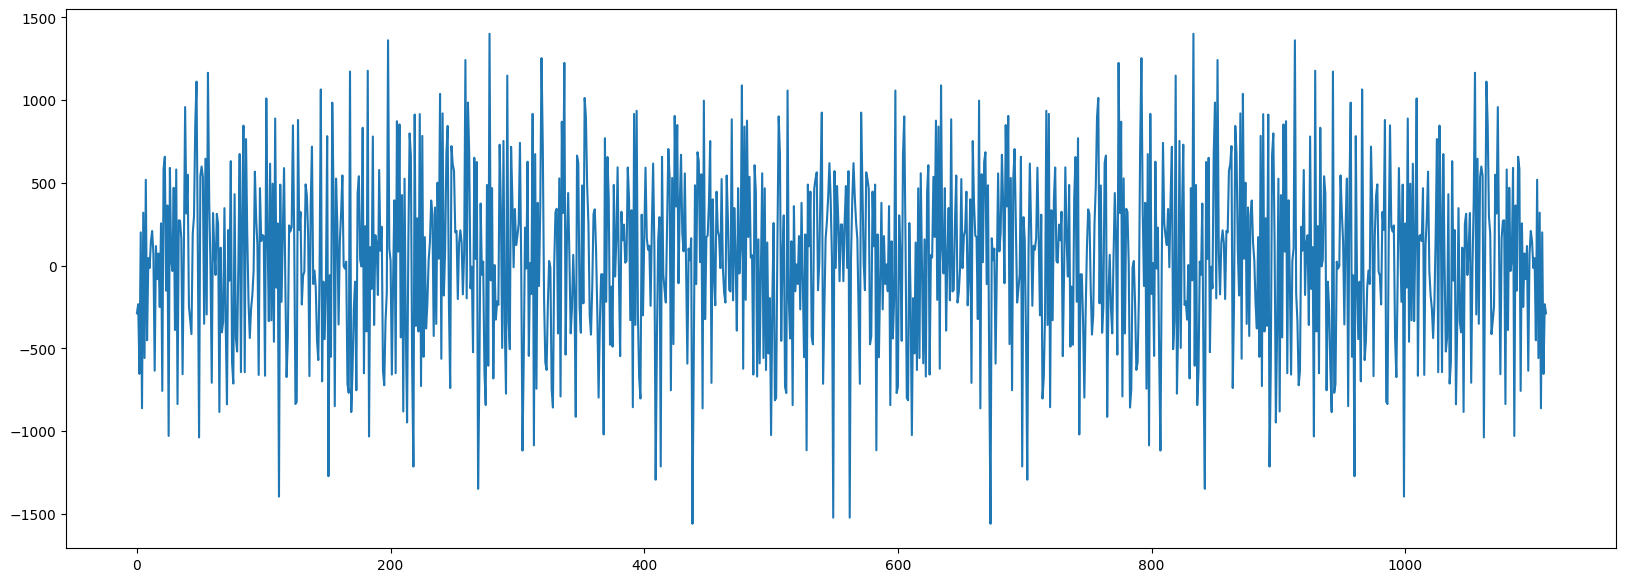

In [124]:
plt.figure(figsize=(20, 7))
fft(data["RoadAccessLength"])
plt.plot(fft(data["RoadAccessLength"])[1::])

Distrubution is spread across a spectrum instead being concentrated. Good!

In [128]:
data.to_csv("./Hotel-Property-Value-Dataset/train_cleaned.csv", index=False)